

#  <u> **Applied machine learning project** </u>
*Chiara Rivi - Master course in Bioinformatics -                                                     a.y. 2021/2022*


---



For this project I chose as dataset the "Breast Cancer Wisconsin (Diagnostic) Data Set".
A good description of what it contains can be found here: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data.
The dataset is retrievable both from the Kaggle page linked above and at the following link https://github.com/CRivi15/Master_Bioinformatics/blob/main/AML/Breast_Cancer.csv.

Te aim of this project was to construct a ML model capable to distinguish between malign and benign breast cancer based on characteristic of digitized image of a fine needle aspirate (FNA) of a breast mass. To do so we tried two different approaches that will be explained in the following lines.


##  <u> **1 - Basic module**  </u>








###  <u> **1.1 - Data loading and exploration** </u>




First of all we loaded the needed libraries

In [251]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from statistics import mean,stdev

np.random.seed(42) # to make the notebook's output stable across subsequent runs

Then we loaded our dataset

In [252]:
data=pd.read_csv('Breast_Cancer.csv', index_col='id')
row=data.shape[0] #number of rows
columns=data.shape[1] #number of columns
print('The dataset is composed of %d rows and %d columns' %(row,columns))


The dataset is composed of 569 rows and 32 columns


In [253]:
pd.options.display.max_columns = 32
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.40,0.006,0.049,0.054,0.016,0.030,0.006,25.38,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119,NaN
842517,M,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.08,0.005,0.013,0.019,0.013,0.014,0.004,24.99,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.03,0.006,0.040,0.038,0.021,0.022,0.005,23.57,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088,NaN
84348301,M,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.23,0.009,0.075,0.057,0.019,0.060,0.009,14.91,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.44,0.011,0.025,0.057,0.019,0.018,0.005,22.54,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077,NaN


Where id represent the ID number of the patient and diagnosis could be either M=malignant or B=benignant, the diagnosis represent our target.


We summarized below some details about the features (a more extensive description can be found at the kaggle page linked at the beginning)



> * radius (mean of distances from center to points on the perimeter)
*texture (standard deviation of gray-scale values)
* perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

For each of these characteristics the mean, the SE and largest of these features (mean of the three largest values) were computed for each image.










In [254]:
 pd.notnull(data["Unnamed: 32"]).sum() #check for non-null value in the last column

0

There was an extra column, full of null values, hence we proceeded to eliminate it

In [255]:
data=data.drop(data.columns[31], axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.40,0.006,0.049,0.054,0.016,0.030,0.006,25.38,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119
842517,M,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.08,0.005,0.013,0.019,0.013,0.014,0.004,24.99,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089
84300903,M,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.03,0.006,0.040,0.038,0.021,0.022,0.005,23.57,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088
84348301,M,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.23,0.009,0.075,0.057,0.019,0.060,0.009,14.91,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173
84358402,M,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.44,0.011,0.025,0.057,0.019,0.018,0.005,22.54,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077


In [256]:
row=data.shape[0]
columns=data.shape[1]
print('Now the dataset is composed of %d rows and %d columns, of which %d represent different features' %(row,columns, columns-1))

Now the dataset is composed of 569 rows and 31 columns, of which 30 represent different features


We then checked the data type of the features and searched for missing values since they can lead to problem during the model creation, none were found.

In [257]:
types = data.dtypes
print(types)

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [258]:
data.isnull().sum() #check for the number of missing values in each column


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Then we checked class distribution since we will work on a classification problem. We can see that we have more data from the benignant class, we will have to take in account this difference during performance evaluation of our model.

In [259]:
class_counts = data.groupby('diagnosis').size()
print(class_counts)

diagnosis
B    357
M    212
dtype: int64


 We used the describe function to have a quick overview of our data

In [260]:
description = data.describe()
print(description)

       radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
count      569.000       569.000         569.000    569.000          569.000   
mean        14.127        19.290          91.969    654.889            0.096   
std          3.524         4.301          24.299    351.914            0.014   
min          6.981         9.710          43.790    143.500            0.053   
25%         11.700        16.170          75.170    420.300            0.086   
50%         13.370        18.840          86.240    551.100            0.096   
75%         15.780        21.800         104.100    782.700            0.105   
max         28.110        39.280         188.500   2501.000            0.163   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count           569.000         569.000              569.000        569.000   
mean              0.104           0.089                0.049          0.181   
std               0.053           0.080   

It's already evident that the range of values of different features vary a lot so we will need to normalize them to avoid introducing bias in our model. We generate also graphs to have a visual description.

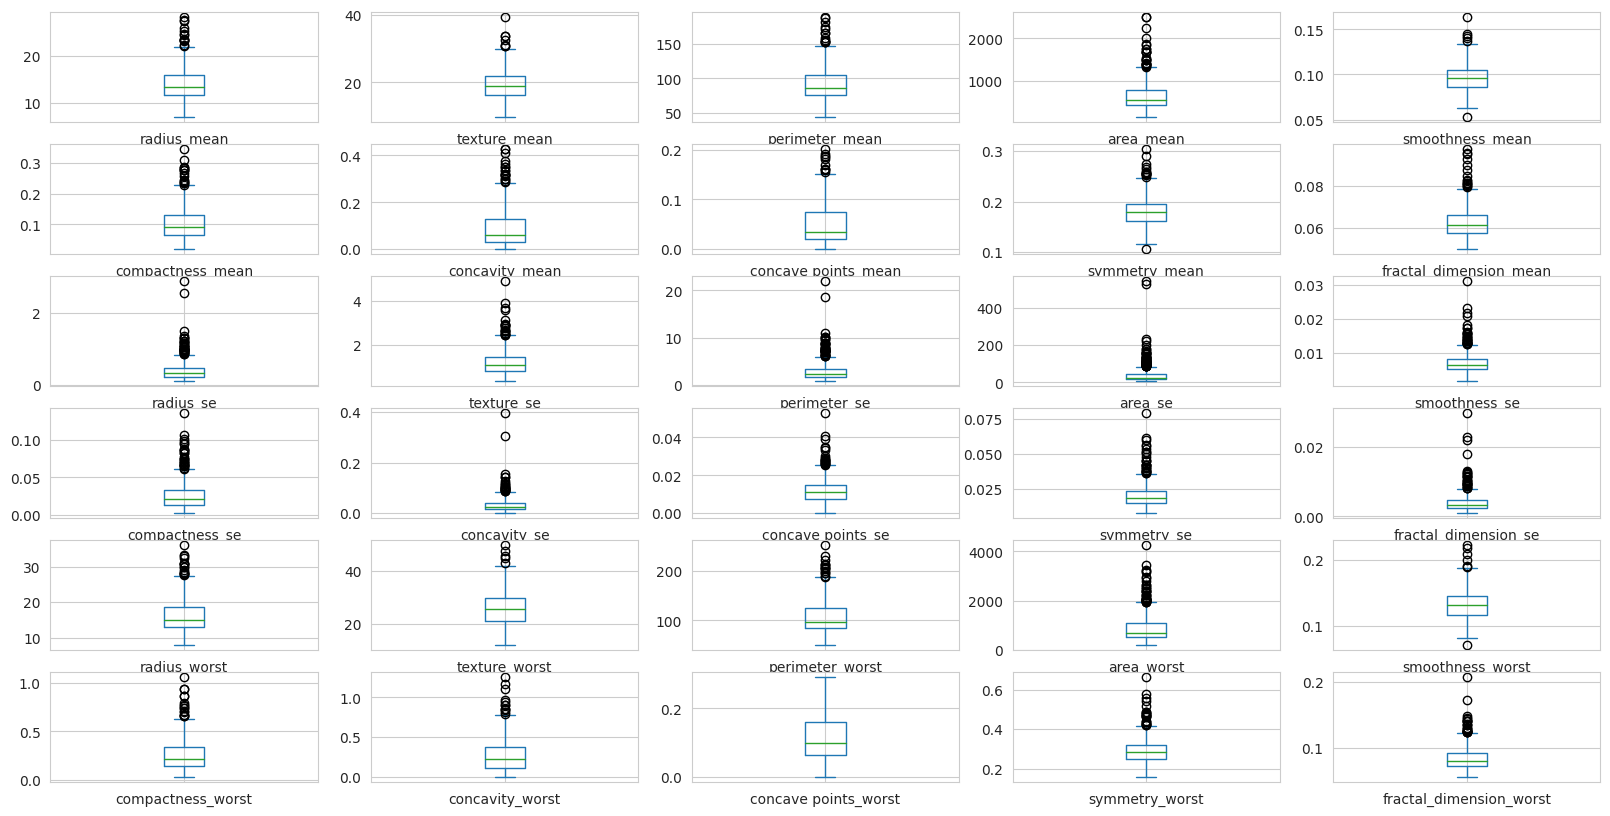

In [261]:
data.plot(kind='box', subplots=True,  layout=(6,5), sharex=False, sharey=False, figsize=(20, 10))
plt.show()


We also checked the correlation of our features. Correlation is a statistical measure of the relationship between two variables. It can range from -1 to 1, where a correlation of 1 indicates a perfect positive correlation, meaning that the two variable move in the same direction, while a correlation of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases proportionally and 0 indicates no association between the two variables.

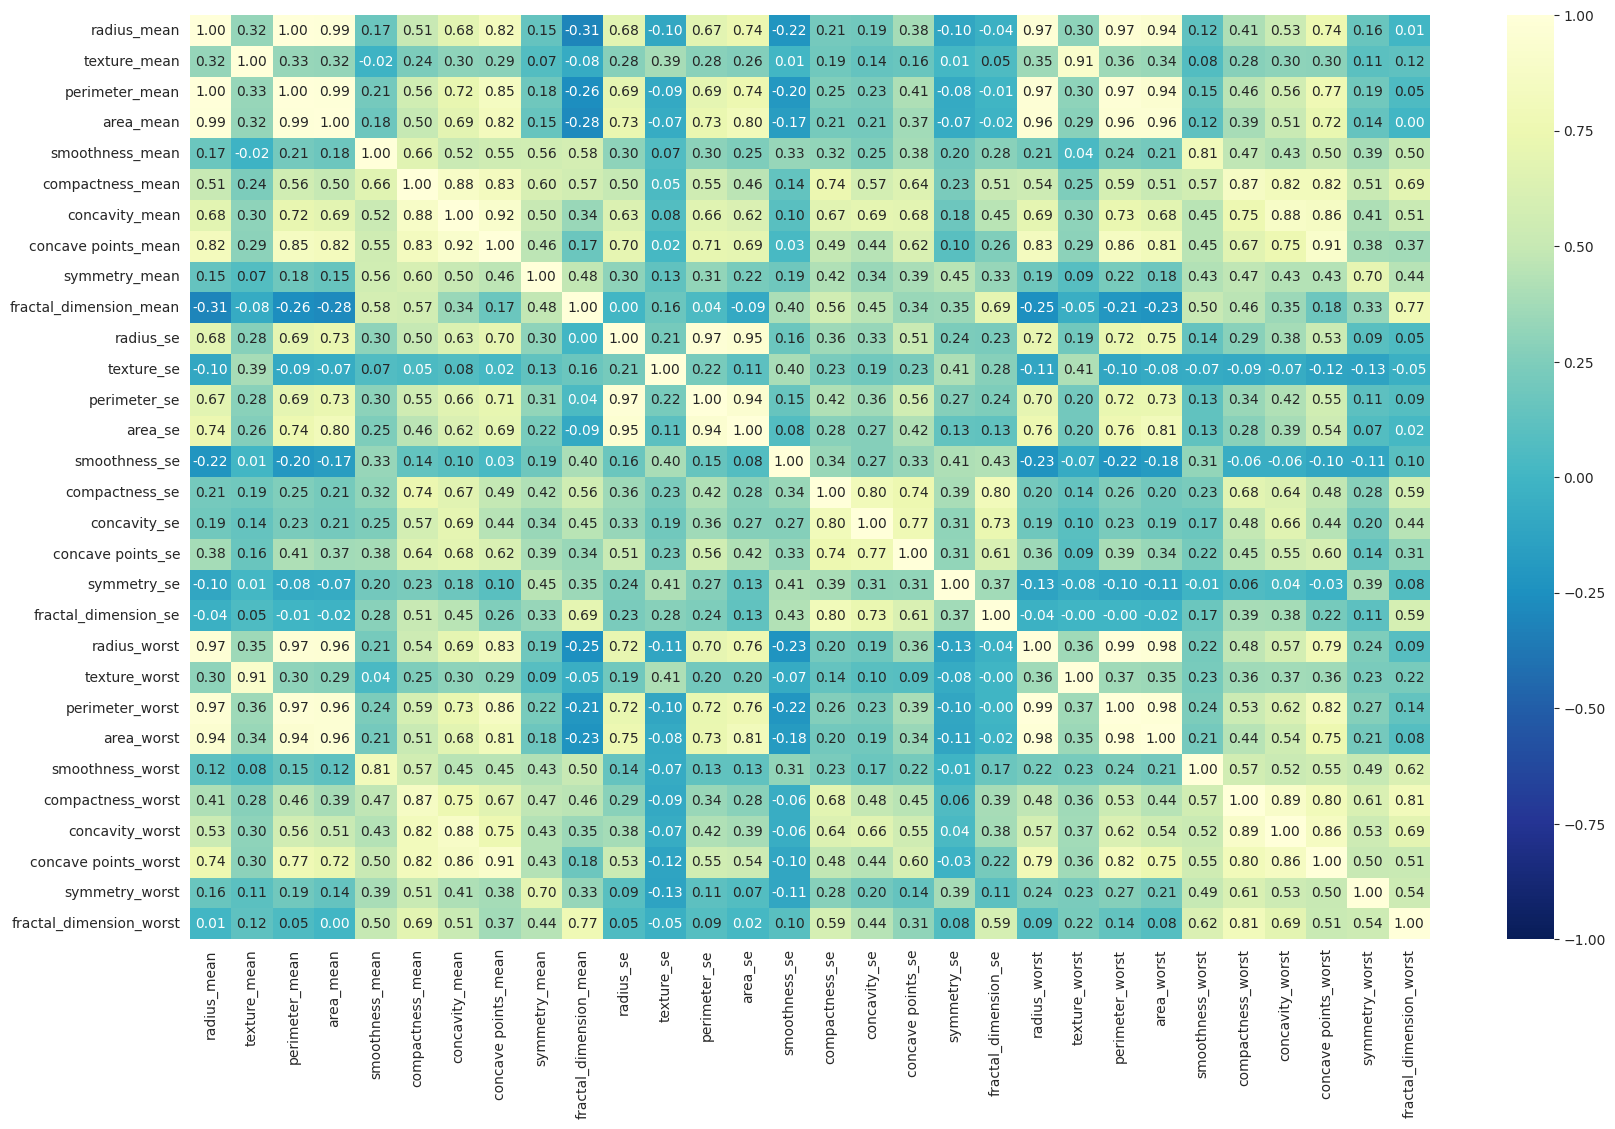

In [262]:
#create a plot to visualize correlation
pd.set_option("display.precision", 3)
corr = data.iloc[:,1:].corr()
plt.figure(figsize=(20, 12))
sn.heatmap(corr, cmap="YlGnBu_r",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.show()

Features with high correlation are more linearly dependent and hence tend to have almost the same effect on the dependent variable. When two features have high correlation we usually can drop one of the two features to avoid redundant information.

### <u>**1.2 - Data preparation**</u>

Since we will work with arrays we need to tranform diagnosis results in a compatible format

In [263]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0}) # In the diagnosis column transform M in 1 and B in 0
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.40,0.006,0.049,0.054,0.016,0.030,0.006,25.38,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119
842517,1,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.08,0.005,0.013,0.019,0.013,0.014,0.004,24.99,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089
84300903,1,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.03,0.006,0.040,0.038,0.021,0.022,0.005,23.57,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088
84348301,1,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.23,0.009,0.075,0.057,0.019,0.060,0.009,14.91,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173
84358402,1,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.44,0.011,0.025,0.057,0.019,0.018,0.005,22.54,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077


Data seem already unordered, to be more sure about it we shuffled the rows to avoid unneccessary bias.

In [264]:
data_shuffled=data.sample(frac=1) #shuffle rows
data_shuffled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
87930,0,12.47,18.60,81.09,481.9,0.100,0.106,0.080,0.038,0.193,0.064,0.396,1.044,2.497,30.29,0.007,0.019,0.027,0.010,0.018,0.004,14.97,24.64,96.05,677.9,0.143,0.238,0.267,0.102,0.301,0.087
859575,1,18.94,21.31,123.60,1130.0,0.090,0.103,0.108,0.080,0.158,0.055,0.789,0.797,5.486,96.05,0.004,0.017,0.023,0.014,0.014,0.002,24.86,26.58,165.90,1866.0,0.119,0.234,0.269,0.179,0.255,0.066
8670,1,15.46,19.48,101.70,748.9,0.109,0.122,0.147,0.081,0.193,0.058,0.474,0.786,3.094,48.31,0.006,0.015,0.028,0.011,0.014,0.002,19.26,26.00,124.90,1156.0,0.155,0.239,0.379,0.151,0.284,0.080
907915,0,12.40,17.68,81.47,467.8,0.105,0.132,0.077,0.028,0.181,0.071,0.177,1.460,2.204,15.43,0.010,0.033,0.049,0.012,0.022,0.006,12.88,22.91,89.61,515.8,0.145,0.263,0.240,0.074,0.256,0.094
921385,0,11.54,14.44,74.65,402.9,0.100,0.112,0.067,0.026,0.182,0.068,0.278,1.768,1.628,20.86,0.012,0.041,0.056,0.015,0.018,0.006,12.26,19.68,78.78,457.8,0.135,0.212,0.180,0.069,0.233,0.081


In [265]:
#separate and transform target in an array
Y=data_shuffled[['diagnosis']] #create a dataset with only diagnosis
arrayY=data_shuffled['diagnosis'].values #create the array
arrayY

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [266]:
# separate feature
X = data_shuffled.iloc[:,1:]
X.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
87930,12.47,18.60,81.09,481.9,0.100,0.106,0.080,0.038,0.193,0.064,0.396,1.044,2.497,30.29,0.007,0.019,0.027,0.010,0.018,0.004,14.97,24.64,96.05,677.9,0.143,0.238,0.267,0.102,0.301,0.087
859575,18.94,21.31,123.60,1130.0,0.090,0.103,0.108,0.080,0.158,0.055,0.789,0.797,5.486,96.05,0.004,0.017,0.023,0.014,0.014,0.002,24.86,26.58,165.90,1866.0,0.119,0.234,0.269,0.179,0.255,0.066
8670,15.46,19.48,101.70,748.9,0.109,0.122,0.147,0.081,0.193,0.058,0.474,0.786,3.094,48.31,0.006,0.015,0.028,0.011,0.014,0.002,19.26,26.00,124.90,1156.0,0.155,0.239,0.379,0.151,0.284,0.080
907915,12.40,17.68,81.47,467.8,0.105,0.132,0.077,0.028,0.181,0.071,0.177,1.460,2.204,15.43,0.010,0.033,0.049,0.012,0.022,0.006,12.88,22.91,89.61,515.8,0.145,0.263,0.240,0.074,0.256,0.094
921385,11.54,14.44,74.65,402.9,0.100,0.112,0.067,0.026,0.182,0.068,0.278,1.768,1.628,20.86,0.012,0.041,0.056,0.015,0.018,0.006,12.26,19.68,78.78,457.8,0.135,0.212,0.180,0.069,0.233,0.081


As we said earlier feature showed different ranges, in order to be able to compare their effect more correctly and avoiding bias later on, we rescaled all of them in the range of 0,1 through the MinMax scaler procedure. Details of the function can be read at https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [267]:
# Rescale data (between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX=X.copy(deep=True) #copied the dataset of features in order to retain also the unmodified version
rescaledX.iloc[:]= scaler.fit_transform(rescaledX)


In [268]:
#compare first rows of scaled data
rescaledX.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
87930,0.260,0.301,0.258,0.144,0.424,0.265,0.188,0.190,0.437,0.290,0.103,0.151,0.082,0.044,0.178,0.127,0.068,0.196,0.140,0.093,0.250,0.336,0.227,0.121,0.472,0.204,0.213,0.349,0.286,0.213
859575,0.566,0.392,0.552,0.418,0.338,0.256,0.253,0.395,0.264,0.098,0.245,0.097,0.223,0.167,0.093,0.107,0.057,0.260,0.084,0.028,0.602,0.388,0.575,0.413,0.318,0.200,0.215,0.615,0.194,0.071
8670,0.401,0.330,0.400,0.257,0.511,0.316,0.343,0.402,0.440,0.168,0.131,0.094,0.110,0.078,0.154,0.095,0.071,0.207,0.086,0.054,0.403,0.373,0.371,0.239,0.551,0.206,0.303,0.520,0.251,0.165
907915,0.256,0.270,0.260,0.138,0.476,0.344,0.181,0.139,0.379,0.444,0.024,0.243,0.068,0.016,0.282,0.231,0.123,0.221,0.197,0.177,0.176,0.290,0.195,0.081,0.488,0.229,0.192,0.253,0.195,0.253
921385,0.216,0.160,0.213,0.110,0.426,0.284,0.158,0.129,0.383,0.376,0.060,0.311,0.041,0.026,0.355,0.292,0.140,0.283,0.148,0.160,0.154,0.204,0.141,0.067,0.418,0.179,0.144,0.238,0.151,0.173


In [269]:
#with original data
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
87930,12.47,18.60,81.09,481.9,0.100,0.106,0.080,0.038,0.193,0.064,0.396,1.044,2.497,30.29,0.007,0.019,0.027,0.010,0.018,0.004,14.97,24.64,96.05,677.9,0.143,0.238,0.267,0.102,0.301,0.087
859575,18.94,21.31,123.60,1130.0,0.090,0.103,0.108,0.080,0.158,0.055,0.789,0.797,5.486,96.05,0.004,0.017,0.023,0.014,0.014,0.002,24.86,26.58,165.90,1866.0,0.119,0.234,0.269,0.179,0.255,0.066
8670,15.46,19.48,101.70,748.9,0.109,0.122,0.147,0.081,0.193,0.058,0.474,0.786,3.094,48.31,0.006,0.015,0.028,0.011,0.014,0.002,19.26,26.00,124.90,1156.0,0.155,0.239,0.379,0.151,0.284,0.080
907915,12.40,17.68,81.47,467.8,0.105,0.132,0.077,0.028,0.181,0.071,0.177,1.460,2.204,15.43,0.010,0.033,0.049,0.012,0.022,0.006,12.88,22.91,89.61,515.8,0.145,0.263,0.240,0.074,0.256,0.094
921385,11.54,14.44,74.65,402.9,0.100,0.112,0.067,0.026,0.182,0.068,0.278,1.768,1.628,20.86,0.012,0.041,0.056,0.015,0.018,0.006,12.26,19.68,78.78,457.8,0.135,0.212,0.180,0.069,0.233,0.081


At this point we tried to get a grasp about the ability of the various feature to separate the two classes through the use of some graphs.

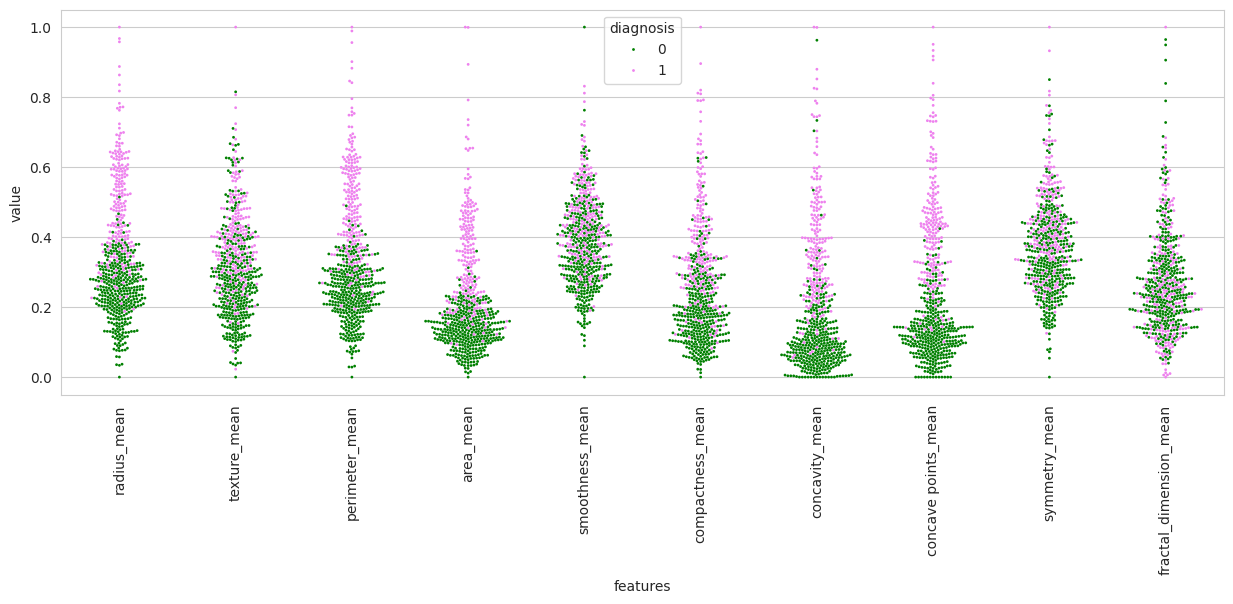

In [270]:
datamean = pd.concat([Y,rescaledX.iloc[:,0:10]],axis=1)
datamean = pd.melt(datamean,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(15,5))
sn.swarmplot(x="features", y="value", hue="diagnosis", data=datamean, palette=['green','Violet'],s=2)
plt.xticks(rotation=90)
plt.show()

Here area, perimeter, radius, concavity and concave points mean seems to separate the two classes quite well, while in simmetry, texture and smoothness they seem to be indistinguishable

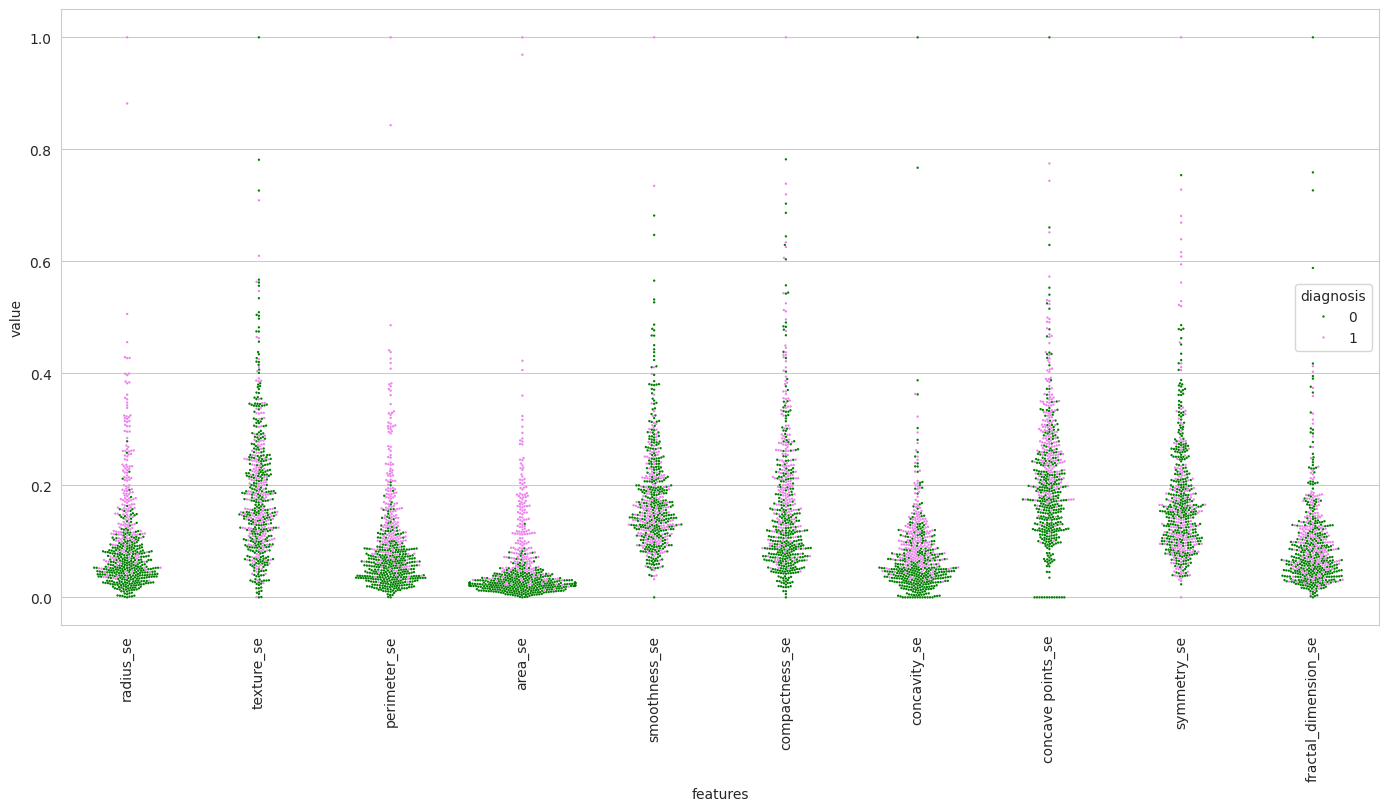

In [271]:
datase = pd.concat([Y,rescaledX.iloc[:,10:20]],axis=1)
datase = pd.melt(datase,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(17,8))
sn.swarmplot(x="features", y="value", hue="diagnosis", data=datase, palette=['green','Violet'],s=1.7)
plt.xticks(rotation=90)
plt.show()

Here area, perimeter and radius se seem to separate the two classes quite well, while in all the other the two classes are mixed.

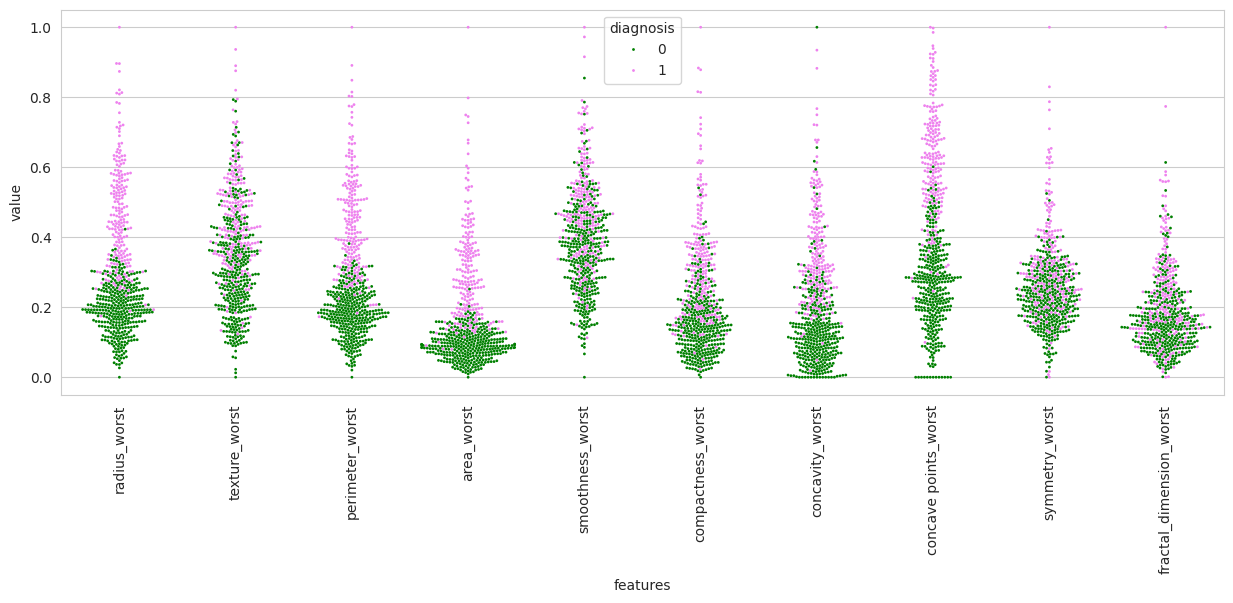

In [272]:
dataworst = pd.concat([Y,rescaledX.iloc[:,20:30]],axis=1)
dataworst = pd.melt(dataworst,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,5))
sn.swarmplot(x="features", y="value", hue="diagnosis", data=dataworst, palette=['green','Violet'],s=2)
plt.xticks(rotation=90)
plt.show()

Here area, perimeter, radius and concave points worst seems to separate the two calsses quite well, while in simmetry, fractal dimension and smoothness they seem to be indistinguishable.

### <u>**1.3 - Feature selection**</u>

Choosing the right features to exploit heavily influence the model performance. The performance of ML model will be affected negatively if the data features provided to it are irrelevant. In particular, performing a correct feature selection  procedure before data modeling  will reduce the risk of overfitting, increase the performance and reduce the training time.


In [273]:
arrayX=rescaledX.values #transform data in arrays

# Feature Importance with Extra Trees Classifier
model = ExtraTreesClassifier()
model.fit(arrayX, arrayY)
feature_importance=model.feature_importances_
print(feature_importance)

[0.07202597 0.02775007 0.04929795 0.04279098 0.01036581 0.01380317
 0.06646362 0.0868798  0.00650205 0.00605682 0.01961509 0.00456422
 0.02041251 0.02358514 0.00606476 0.01159433 0.00865623 0.01134632
 0.00594503 0.0059976  0.08357116 0.0237982  0.09995487 0.09697282
 0.02155837 0.01892684 0.03557306 0.09494054 0.01426042 0.01072622]


In [274]:
df_v={'Feature_importance':feature_importance,
    'Feature name': rescaledX.columns}
df=pd.DataFrame(df_v)
df.sort_values('Feature_importance', ascending=False)

,Feature_importance,Feature name
22,0.100,perimeter_worst
23,0.097,area_worst
27,0.095,concave points_worst
7,0.087,concave points_mean
20,0.084,radius_worst
0,0.072,radius_mean
6,0.066,concavity_mean
2,0.049,perimeter_mean
3,0.043,area_mean
26,0.036,concavity_worst


Here I took in consideration all the features, altough some of them like perimeter_worst and area_worst showed a strong correlation in the analysis of section 1.1. Based on the feature importance list, the swarm plot graphs and the correlation study did in section 1.1 we dropped some of the columns in order to obtain a table with feature correlation equal or less than 0.80.

In [275]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','concavity_mean','texture_mean','area_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concavity_worst','area_se','smoothness_mean']
data_clean = rescaledX.drop(drop_list,axis = 1 )        # do not modify rescaledX, we could use it later
data_clean.head()

,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,
87930,0.437,0.290,0.151,0.178,0.127,0.068,0.196,0.140,0.093,0.336,0.121,0.472,0.349,0.286,0.213
859575,0.264,0.098,0.097,0.093,0.107,0.057,0.260,0.084,0.028,0.388,0.413,0.318,0.615,0.194,0.071
8670,0.440,0.168,0.094,0.154,0.095,0.071,0.207,0.086,0.054,0.373,0.239,0.551,0.520,0.251,0.165
907915,0.379,0.444,0.243,0.282,0.231,0.123,0.221,0.197,0.177,0.290,0.081,0.488,0.253,0.195,0.253
921385,0.383,0.376,0.311,0.355,0.292,0.140,0.283,0.148,0.160,0.204,0.067,0.418,0.238,0.151,0.173


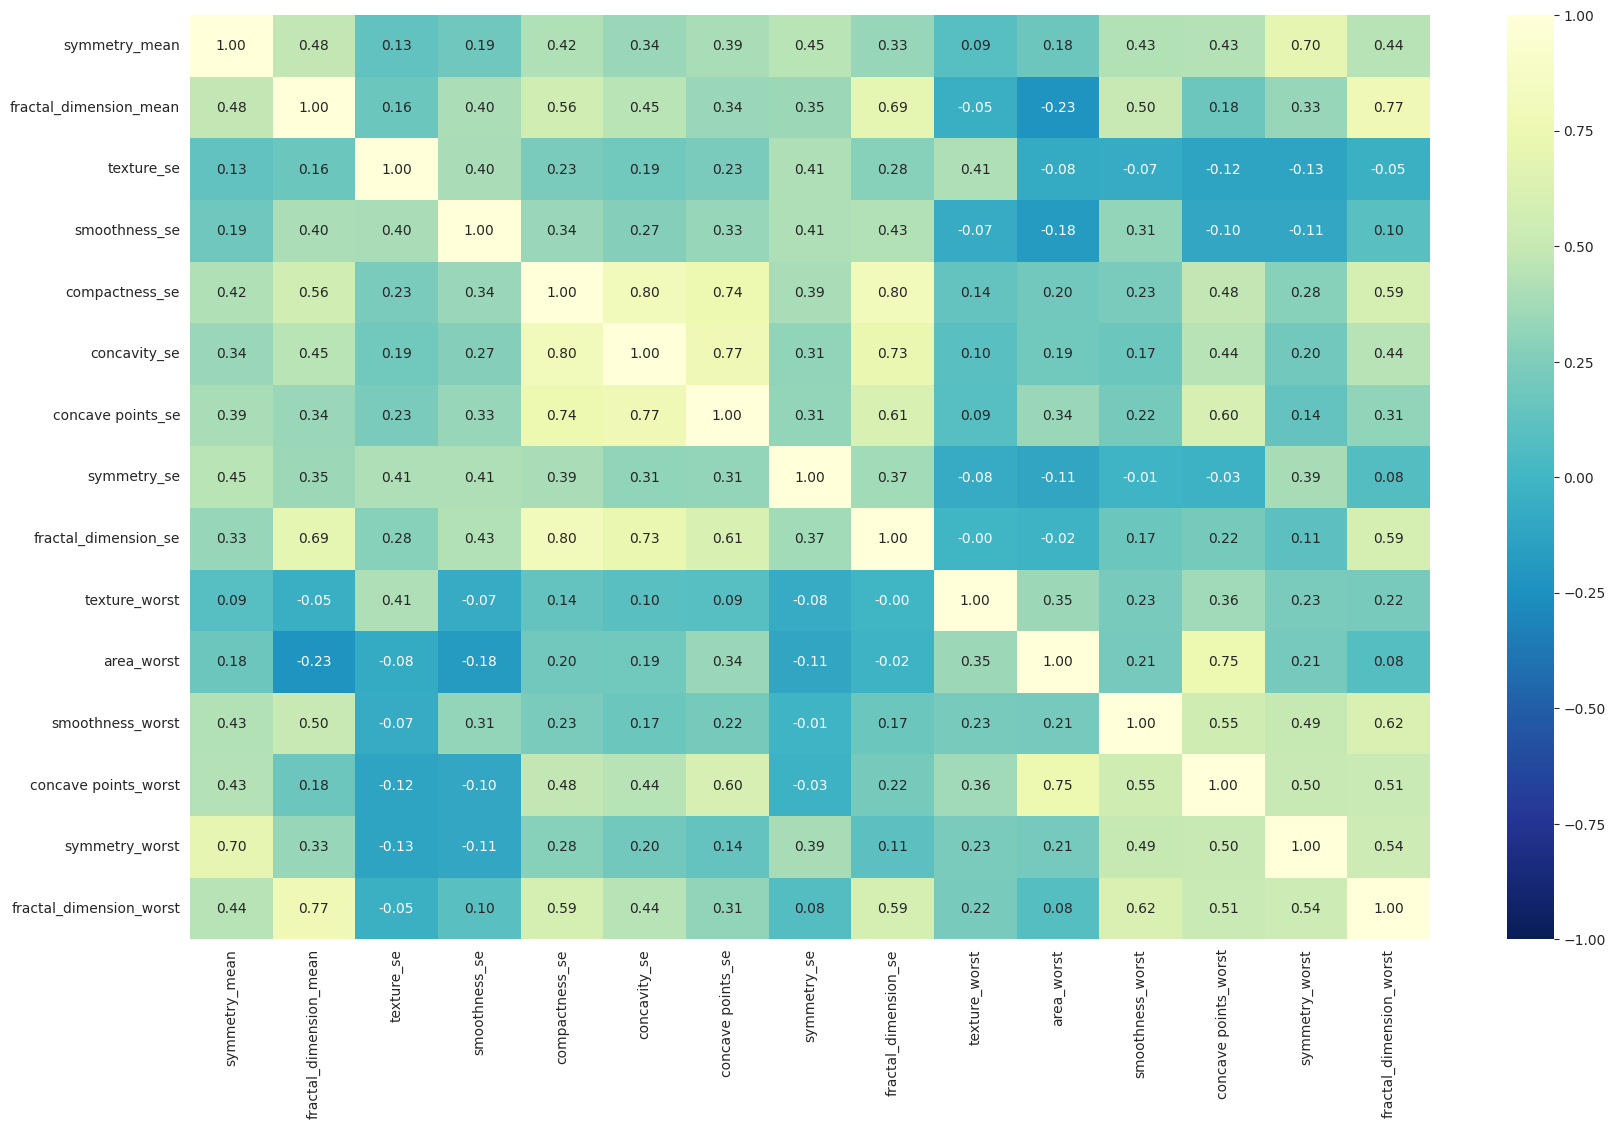

In [276]:
#plot correlation after the removal of the features with high correlation
pd.set_option("display.precision", 3)
corr = data_clean.corr()
plt.figure(figsize=(20, 12))
sn.heatmap(corr, cmap="YlGnBu_r",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.show()

In [277]:
arrayXclean=data_clean.values #transform data in arrays
names=data.columns
# Feature Importance with Extra Trees Classifier
model = ExtraTreesClassifier()
model.fit(arrayXclean, arrayY)
feature_importance=model.feature_importances_
print(feature_importance)

[0.02528246 0.0338113  0.01730855 0.02008497 0.0253048  0.03841904
 0.05644471 0.02531793 0.01741329 0.0716805  0.20113665 0.05085669
 0.3328592  0.05340648 0.03067342]


In [278]:
df_v={'Feature_importance':feature_importance,
    'Feature name': data_clean.columns}
df=pd.DataFrame(df_v)
df.sort_values('Feature_importance', ascending=False)

,Feature_importance,Feature name
12,0.333,concave points_worst
10,0.201,area_worst
9,0.072,texture_worst
6,0.056,concave points_se
13,0.053,symmetry_worst
11,0.051,smoothness_worst
5,0.038,concavity_se
1,0.034,fractal_dimension_mean
14,0.031,fractal_dimension_worst
7,0.025,symmetry_se


Area worst, concave points worst and texture worst seem like the best feature to select for our model.

This way to select feature is quite crafty, another way to reduce the number of feature that work quite well in complex database like this one is PCA. PCA in fact reduce the number of features of a data set while preserving as much information as possible. In this case the dataset result completly transformed.

In [279]:
# Feature Extraction with PCA
pca = PCA(n_components=8)
pca_fit = pca.fit(arrayX)
# summarize components
print("Explained Variance: %s" % pca_fit.explained_variance_ratio_)

Explained Variance: [0.53097689 0.1728349  0.07114442 0.06411259 0.04086072 0.03071494
 0.01580837 0.01191472]


With 8 components we covered around 95% of the variance, so we deemed it enough. To have a glimpse of how data were tranformed we printed it.

In [280]:
data_pca=pca.transform(arrayX) #transform data
data_pca

array([[-0.13180261,  0.11365577, -0.03487521, ..., -0.00182565,
         0.00516204, -0.00791054],
       [ 0.48472371, -0.58726992, -0.06691605, ..., -0.0492493 ,
         0.02730779,  0.02263687],
       [ 0.29631665, -0.09299811, -0.0998375 , ..., -0.07974608,
        -0.09797536, -0.03397659],
       ...,
       [-0.63467025, -0.48450125, -0.09368842, ...,  0.12934002,
         0.03776373, -0.03668056],
       [ 0.21530433,  0.11880749,  0.03511418, ..., -0.12999937,
        -0.04137519, -0.00766981],
       [-0.48969612, -0.20757686,  0.243385  , ...,  0.05182811,
        -0.07969657, -0.06982168]])

To have a better idea of how feature selection impact the model performance both selections were maintened and compared in the following steps.

### <u>**1.4 - Model creation and perfomance evaluation**</u>

To create our model we applied cross-validation. Cross-validation is a resampling method that uses a limited data sample in order to estimate how the model is expected to perform in general, when used to make predictions on data not used during the training of the model.

As model we employed logistic regression, a supervised machine learning algorithm that performs binary classification tasks by predicting the probability of an outcome. The model delivers a binary outcome limited to two possible results: yes/no, 0/1, or true/false.

In [281]:
#setting parameters for our model
model = LogisticRegression(solver='lbfgs', max_iter=300)
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'precision': 'precision',
           'recall':'recall',
           'MCC':'matthews_corrcoef'
           }

In [282]:
#Model created with manual feature selection
dataX=data_clean[['concave points_worst','area_worst','texture_worst']].values #select feature of interest
scores_m = cross_validate(model, dataX , arrayY, scoring=scoring,  cv=5)
print(scores_m)

{'fit_time': array([0.010813  , 0.01064134, 0.00431061, 0.00405121, 0.0040679 ]), 'score_time': array([0.01875401, 0.01261353, 0.00579882, 0.00834751, 0.00568485]), 'test_acc': array([0.93859649, 0.95614035, 0.94736842, 0.96491228, 0.9380531 ]), 'test_F1': array([0.91139241, 0.93670886, 0.92682927, 0.95121951, 0.91139241]), 'test_precision': array([0.97297297, 1.        , 0.97435897, 1.        , 0.97297297]), 'test_recall': array([0.85714286, 0.88095238, 0.88372093, 0.90697674, 0.85714286]), 'test_MCC': array([0.86876649, 0.90760547, 0.88846063, 0.92660922, 0.86816804])}


In [283]:
dict_m={}  #create a dictionary to save scores
for key in scores_m:
  dict_m[key]=scores_m[key] #load dictionary
  mean_score_m=mean(scores_m[key])
  sd_m=stdev(scores_m[key])
  print(key,'mean is {:.3f} with standard deviation of {:.3f}'. format(mean_score_m, sd_m))

fit_time mean is 0.007 with standard deviation of 0.004
score_time mean is 0.010 with standard deviation of 0.006
test_acc mean is 0.949 with standard deviation of 0.012
test_F1 mean is 0.928 with standard deviation of 0.017
test_precision mean is 0.984 with standard deviation of 0.015
test_recall mean is 0.877 with standard deviation of 0.021
test_MCC mean is 0.892 with standard deviation of 0.025


In [284]:
df_m=pd.DataFrame(dict_m) #create a dataframe out of the dictionary
df_m.drop(df_m.columns[[0, 1]], axis=1, inplace=True)
df_m

,test_acc,test_F1,test_precision,test_recall,test_MCC
0,0.939,0.911,0.973,0.857,0.869
1,0.956,0.937,1.000,0.881,0.908
2,0.947,0.927,0.974,0.884,0.888
3,0.965,0.951,1.000,0.907,0.927
4,0.938,0.911,0.973,0.857,0.868


In [285]:
#model with PCA selection
scores_pca = cross_validate(model, data_pca , arrayY, scoring=scoring,  cv=5)
print(scores_pca)

{'fit_time': array([0.01110721, 0.00416827, 0.00375605, 0.00459623, 0.00388622]), 'score_time': array([0.00845098, 0.00596356, 0.00693798, 0.00609446, 0.00597477]), 'test_acc': array([0.98245614, 0.97368421, 0.96491228, 0.95614035, 0.95575221]), 'test_F1': array([0.97560976, 0.96385542, 0.95121951, 0.93975904, 0.93670886]), 'test_precision': array([1.        , 0.97560976, 1.        , 0.975     , 1.        ]), 'test_recall': array([0.95238095, 0.95238095, 0.90697674, 0.90697674, 0.88095238]), 'test_MCC': array([0.9626219 , 0.94333976, 0.92660922, 0.90681061, 0.90719071])}


In [286]:
dict_pca={}
for key in scores_pca:
  dict_pca[key]=scores_pca[key] #load dictionary
  mean_score_pca=mean(scores_pca[key])
  sd_pca=stdev(scores_pca[key])
  print(key,'mean is {:.3f} with standard deviation of {:.3f}'. format(mean_score_pca, sd_pca))

fit_time mean is 0.006 with standard deviation of 0.003
score_time mean is 0.007 with standard deviation of 0.001
test_acc mean is 0.967 with standard deviation of 0.012
test_F1 mean is 0.953 with standard deviation of 0.016
test_precision mean is 0.990 with standard deviation of 0.014
test_recall mean is 0.920 with standard deviation of 0.031
test_MCC mean is 0.929 with standard deviation of 0.024


In [287]:
df_pca=pd.DataFrame(dict_pca) #create a dataframe out of the dictionary
df_pca.drop(df_pca.columns[[0, 1]], axis=1, inplace=True)
df_pca

,test_acc,test_F1,test_precision,test_recall,test_MCC
0,0.982,0.976,1.000,0.952,0.963
1,0.974,0.964,0.976,0.952,0.943
2,0.965,0.951,1.000,0.907,0.927
3,0.956,0.940,0.975,0.907,0.907
4,0.956,0.937,1.000,0.881,0.907


We printed different evaluation score for our model. Since we have skewed data the most reliable is the MCC,this measure in fact tend to be less affected by it. Different studies have been done on this topic, a good reference could be https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7.
<br>Taking this in consideration the model were the the feature were extracted through PCA seems to perform better and all the other metrics seem to support this claim. A graphical representation of the metrics comparison was produced as visual aid.

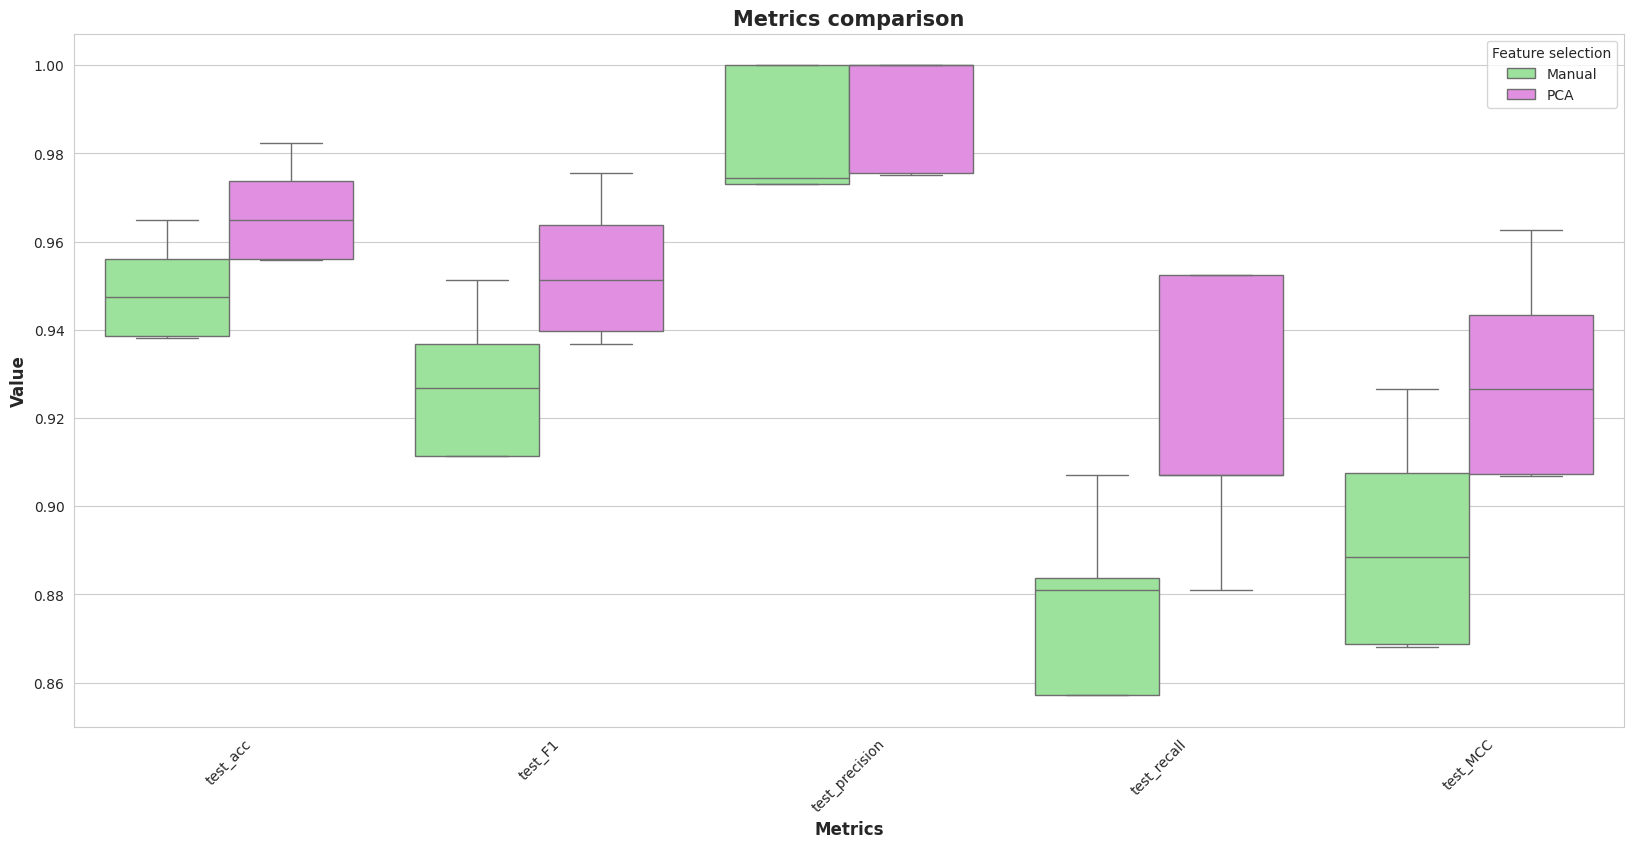

In [288]:
# pd.melt converts the dataframe to long form, pd.concat combines them
df_comp= pd.concat({'Manual': df_m.melt(), 'PCA': df_pca.melt()}, names=['Feature selection', 'old_index'])
# convert the source index to a column, and reset the old index
df_comp = df_comp.reset_index(level=0).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(20, 9))
sn.boxplot(data=df_comp, x='variable', y='value', hue='Feature selection', palette=['lightgreen','violet'], ax=ax)
sn.set_style("whitegrid")
plt.xticks(rotation=45)
plt.title('Metrics comparison',fontweight='bold', fontsize=15)
plt.xlabel('Metrics',fontweight='bold', fontsize=12)
plt.ylabel('Value', fontweight='bold', fontsize=12)
plt.show()

We can see that the only metric were the two models achieve almost the same score is the precision. We should however consider that we are working with a dataset that aim to distinguish between malign and benign form of cancer, hence here recall acquire an higher importance than precision, with the goal to send every patient that result possibly positive to sustain further diagnostic exams. This type of disease can be quite aggressive and a tempestive intervention is crucial in order to increase the survivability rate of patients.

## <u> **2 - Advanced module**  </u>

For what regard the advanced module we can keep the step explained in data loading, exploration and preparation of the Basic module (1.1 and 1.2). For what regard feature selection and model creation and evalution we will perform instead different steps.

### <u>**2.1 - Additional libraries loading**</u>

In [289]:
import time
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


### <u>**2.2 - Model creation**</u>

As starting point we used the data that underwent PCA since, like we already explained in the basic part, PCA permit to reduce features dimension while limiting the loss of information.
In this case we also performed a train/test split in order to retain a blind test.

In [290]:
# Train/Test split
x_train, x_test, y_train, y_test = train_test_split(data_pca, arrayY, test_size = .20,shuffle=False)

#### <u>**2.2.1 - Random forest**</u>

A Random Forest is a popular machine learning algorithm used for both classification and regression tasks. It is an ensemble learning method that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

To have a greater control over the parameter selection here we performed a grid search on the training set.

In [291]:
scoring_grid= {
           'MCC':'matthews_corrcoef'
           }
#parameters to test in the grid search
grid_rf = {
    'n_estimators': [100,200,300,400],
    'max_features': [3,5,'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy','log_loss']
}

In [292]:
#perform the grid search
start=time.time()
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv= 5, scoring=scoring_grid, refit='MCC')
rf_cv.fit(x_train, y_train)
end=time.time()

In [293]:
print('The grid search applied to the random forest required {:.3f} seconds'.format(end-start))

The grid search applied to the random forest required 512.449 seconds


In [294]:
rf_cv.best_params_ #retrieve the best parameters obtained in the grid search

{'criterion': 'gini', 'max_depth': 7, 'max_features': 5, 'n_estimators': 200}

In [295]:
rf_cv.best_score_ #retrieve the best MCC score obtained in grid search

0.9290249324572674

In [296]:
#create the model with the best parameters obtained
rf_mod = RandomForestClassifier(n_estimators = 200, max_depth = 7, max_features = 5, criterion = 'gini').fit(x_train, y_train)

To evaluate the ability to generalize of our model we will compute some performance metrics over the blind test set and plot the confusion matrix.

In [297]:
y_predrf=rf_mod.predict(x_test)

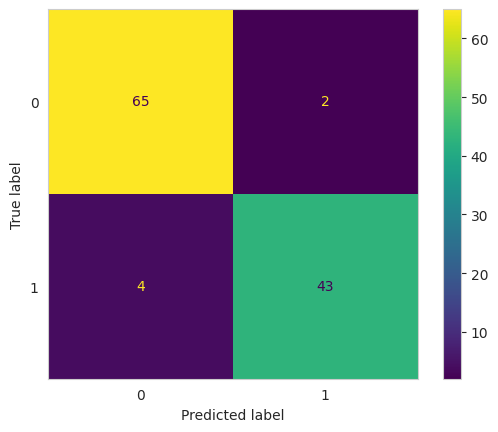

In [298]:
cm_rf=metrics.confusion_matrix(y_test,y_predrf) #confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.grid(False)
plt.show()

Where:
*   True label:0 and Predicted label:0 correspond to true negative(TN)
*   True label:0 and Predicted label:1 correspond to false positive(FP)
*   True label:1 and Predicted label:0 correspond to false negative(FN)
*   True label:1 and Predicted label:1 correspond to true positive (TP)


In [299]:
#print evaluation metrics relatively to the test set
dict_rf={} #create dictionary to store metrics
mcc_testrf=metrics.matthews_corrcoef(y_test,y_predrf)
print('The MCC computed on the test set is {:.3f}'.format(mcc_testrf))
dict_rf['MCC']=mcc_testrf
acc_testrf=metrics.accuracy_score(y_test,y_predrf)
print('The accuracy computed on the test set is {:.3f}'.format(acc_testrf))
dict_rf['Acc']=acc_testrf
precision_testrf=metrics.precision_score(y_test,y_predrf)
print('The precision computed on the test set is {:.3f}'.format(precision_testrf))
dict_rf['Precision']=precision_testrf
recall_testrf=metrics.recall_score(y_test,y_predrf)
print('The recall computed on the test set is {:.3f}'.format(recall_testrf))
dict_rf['Recall']=recall_testrf
f1_testrf=metrics.f1_score(y_test,y_predrf)
print('The F1 score computed on the test set is {:.3f}'.format(f1_testrf))
dict_rf['F1 score']=f1_testrf

The MCC computed on the test set is 0.891
The accuracy computed on the test set is 0.947
The precision computed on the test set is 0.956
The recall computed on the test set is 0.915
The F1 score computed on the test set is 0.935


#### <u>**2.2.2 - SVM**</u>

Support Vector Machines, abbreviated in SVMs, are machine
learning algorithms that could be used both for regression and
classification tasks, but are more commonly applied to the latter.
In case of classification problems SVMs search for a hyperplane that
best separates data by trying to maximize the margin, namely the
distance between hyperplane and the data closest to the hyperplane in
both classes, which are called support vectors.

In [300]:
#parameters to test in the grid search
grid_svm = {
    'C': [1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':['scale', 'auto',0.001,0.01,1.0],
    'degree':[3,4,5,6],
}

In [301]:
#perform the grid search
start2=time.time()
svm_cv = GridSearchCV(estimator=SVC(), param_grid=grid_svm, cv= 5, scoring=scoring_grid, refit='MCC')
svm_cv.fit(x_train, y_train)
end2=time.time()

In [302]:
print('The grid search applied to the svm  required {:.3f} seconds'.format(end2-start2))

The grid search applied to the svm  required 11.047 seconds


We can see how the grid search performed with SVM employed a lot less time.

In [303]:
svm_cv.best_params_ #retrieve the best parameters obtained in the grid search

{'C': 1000, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}

In [304]:
svm_cv.best_score_ #retrieve the best MCC score obtained in grid search

0.9571278229705198

In this case we also computed a finer grid search to try to improve even more our results

In [305]:
grid_svm2 = {
    'C': [250,500,750,1000,1250],
    'kernel': ['rbf'],
    'gamma':[0.005,0.01, 0.015]
} #degree parameter was not tested since it is not considered in a rbf kernel

In [306]:
#perform the grid search
svm_cv2 = GridSearchCV(estimator=SVC(), param_grid=grid_svm2, cv= 5, scoring=scoring_grid, refit='MCC')
svm_cv2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [250, 500, 750, 1000, 1250],
                         'gamma': [0.005, 0.01, 0.015], 'kernel': ['rbf']},
             refit='MCC', scoring={'MCC': 'matthews_corrcoef'})

In [307]:
svm_cv2.best_score_ #retrieve the best MCC score obtained in grid search

0.9573117989110532

In [308]:
svm_cv2.best_params_ #retrieve the best parameters obtained in the grid search

{'C': 500, 'gamma': 0.005, 'kernel': 'rbf'}

In [309]:
#create the model with the best parameters obtained
svm_mod = SVC(C=500, kernel='rbf', gamma=0.005).fit(x_train, y_train)

As before we computed some metrics performance and displayed the confusion matrix

In [310]:
y_predsvm=svm_mod.predict(x_test)

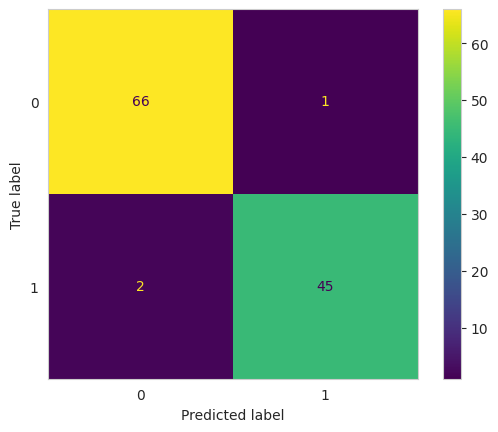

In [311]:
cm_svm=metrics.confusion_matrix(y_test,y_predsvm) #confusion matrix
#plot the confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.grid(False)
plt.show()

In [312]:
#print evaluation metrics relatively to the test set
dict_svm={} #creat dictionary to store SVM performance metrics
mcc_testsvm=metrics.matthews_corrcoef(y_test,y_predsvm)
print('The MCC computed on the test set is {:.3f}'.format(mcc_testsvm))
dict_svm['MCC']=mcc_testsvm
acc_testsvm=metrics.accuracy_score(y_test,y_predsvm)
print('The accuracy computed on the test set is {:.3f}'.format(acc_testsvm))
dict_svm['Acc']=acc_testsvm
precision_testsvm=metrics.precision_score(y_test,y_predsvm)
print('The precision computed on the test set is {:.3f}'.format(precision_testsvm))
dict_svm['Precision']=precision_testsvm
recall_testsvm=metrics.recall_score(y_test,y_predsvm)
print('The recall computed on the test set is {:.3f}'.format(recall_testsvm))
dict_svm['Recall']=recall_testsvm
f1_testsvm=metrics.f1_score(y_test,y_predsvm)
print('The F1 score computed on the test set is {:.3f}'.format(f1_testsvm))
dict_svm['F1 score']=f1_testsvm

The MCC computed on the test set is 0.946
The accuracy computed on the test set is 0.974
The precision computed on the test set is 0.978
The recall computed on the test set is 0.957
The F1 score computed on the test set is 0.968


#### <u>**2.2.3 - Performance comparison**</u>

To make their performances more easily comparable we created a table

In [313]:
data_rf=pd.DataFrame.from_dict(dict_rf,orient='index',columns=['Random Forest'])
data_svm=pd.DataFrame.from_dict(dict_svm,orient='index',columns=['SVM'])
perf_comp_adv=pd.concat([data_rf,data_svm], axis=1)
perf_comp_adv

,Random Forest,SVM
MCC,0.891,0.946
Acc,0.947,0.974
Precision,0.956,0.978
Recall,0.915,0.957
F1 score,0.935,0.968


The SVM model seems the one that performs better, with an MCC on the blind test of 0.946 against the 0.891 of the random forest. The performance seems even better than the ones obtained through the cross-validation with the logistic regression in section 1.
In conclusion at the end of our analysis the SVM model seems the more suitable for our scope, showing also the highest recall and hence allowing us to identify swiftly the majority of positive case.

We could have also tried to create a deep learning model but since we were working with a medical dataset we ultimatly decided against it. Deep learning method are undoubtly very powerful  but power come at the cost of their explainability and this represent a problem in their implentation in diagnostic routines (T. Dhar, N. Dey, S. Borra and R. S. Sherratt, "Challenges of Deep Learning in Medical Image Analysis—Improving Explainability and Trust," in IEEE Transactions on Technology and Society, vol. 4, no. 1, pp. 68-75, March 2023, doi: 10.1109/TTS.2023.3234203.)